# ML Plus Elo

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

%matplotlib inline 

In [2]:
data_dir = '../data/'
os.listdir(data_dir)

['latest_data.csv', 'weekly_preds.csv', 'historical_data.csv']

In [3]:
data = pd.read_csv(data_dir + 'historical_data.csv')

In [4]:
data.isna().sum()

date                  0
season                0
neutral               0
playoff           15964
team1                11
team2                11
elo1_pre             11
elo2_pre             11
elo_prob1            11
elo_prob2            11
elo1_post           132
elo2_post           132
qbelo1_pre         2294
qbelo2_pre         2294
qb1                2179
qb2                2180
qb1_value_pre      2173
qb2_value_pre      2173
qb1_adj            2162
qb2_adj            2162
qbelo_prob1        2173
qbelo_prob2        2173
qb1_game_value     2294
qb2_game_value     2294
qb1_value_post     2294
qb2_value_post     2294
qbelo1_post        2294
qbelo2_post        2294
score1              132
score2              132
dtype: int64

In [5]:
data = data[np.logical_not(data['score1'].isna())]
data = data[np.logical_not(data['score2'].isna())]

In [6]:
data.isna().sum()

date                  0
season                0
neutral               0
playoff           15843
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post             0
elo2_post             0
qbelo1_pre         2162
qbelo2_pre         2162
qb1                2162
qb2                2162
qb1_value_pre      2162
qb2_value_pre      2162
qb1_adj            2162
qb2_adj            2162
qbelo_prob1        2162
qbelo_prob2        2162
qb1_game_value     2162
qb2_game_value     2162
qb1_value_post     2162
qb2_value_post     2162
qbelo1_post        2162
qbelo2_post        2162
score1                0
score2                0
dtype: int64

In [7]:
data = data[data['season'] > 1959]

In [8]:
data = data[data['score1'] != data['score2']]

In [9]:
data.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
2903,1960-09-09,1960,0,NaN,NE,DEN,1300.000,1300.000,0.592466,0.407534,...,0.566862,0.433138,12.540000,122.760000,1.254000,32.931770,1283.942071,1316.057929,10.0,13.0
2904,1960-09-10,1960,0,NaN,LAC,KC,1300.000,1300.000,0.592466,0.407534,...,0.589531,0.410469,316.140000,153.120000,31.614000,11.872908,1305.532159,1294.467841,21.0,20.0
2905,1960-09-11,1960,0,NaN,OAK,TEN,1300.000,1300.000,0.592466,0.407534,...,0.523584,0.476416,147.180000,238.920000,14.718000,86.530014,1270.748277,1329.251723,22.0,37.0
2906,1960-09-11,1960,0,NaN,NYJ,BUF,1300.000,1300.000,0.592466,0.407534,...,0.534573,0.465427,116.820000,-67.650000,11.682000,36.502993,1329.638852,1270.361148,27.0,3.0
2907,1960-09-16,1960,0,NaN,OAK,KC,1266.146,1294.513,0.552525,0.447475,...,0.556189,0.443811,-96.257257,185.463743,3.620474,29.231991,1237.400627,1327.815491,16.0,34.0


In [10]:
def add_elo_features(data):
    """ Based on the elo rating for the two teams, 
        create new features.  Here, elo1 is assumed
        to be the home team.
        
        The data is modified inplace.
    """
    data['elo_sum'] = data['elo1_pre'] + data['elo2_pre']
    data['elo_diff'] = data['elo1_pre'] - data['elo2_pre']
    data['elo_asym'] = data['elo_diff'] / data['elo_sum']

In [11]:
add_elo_features(data)

In [12]:
def add_targets(data):
    """ Add targets based on the game outcome. """
    
    # Did the home team win? Note, ties are removed.
    data['outcome'] = data['score1'] > data['score2']
    data['outcome'] = data['outcome'].astype(np.int)
    
    data['point_sum'] = data['score1'] + data['score2']
    data['point_diff'] = data['score1'] - data['score2']
    data['point_asym'] = data['point_diff'] / data['point_sum']

In [13]:
add_targets(data)

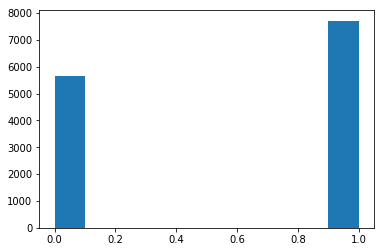

In [14]:
plt.hist(data['outcome']);

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


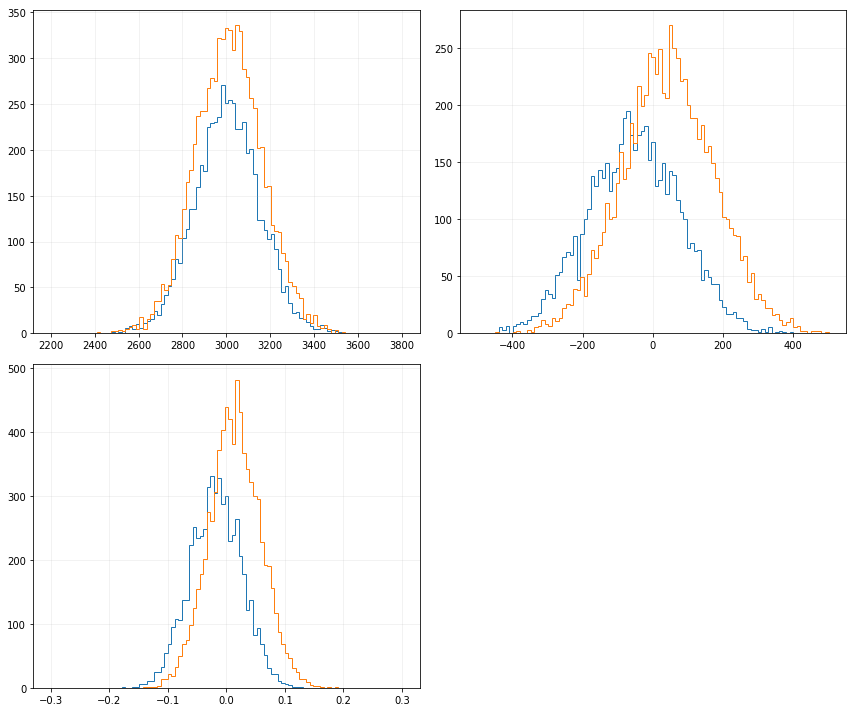

In [15]:
plt.figure(figsize=(12,10))

for outcome, subdata in data.groupby('outcome'):
    
    plt.subplot(2, 2, 1)
    plt.hist(subdata['elo_sum'], 
             bins=np.linspace(2200, 3800, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
    plt.subplot(2, 2, 2)
    plt.hist(subdata['elo_diff'], 
             bins=np.linspace(-500, 500, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
    plt.subplot(2, 2, 3)
    plt.hist(subdata['elo_asym'], 
             bins=np.linspace(-0.3, 0.3, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
plt.tight_layout()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
features = ['elo_sum', 'elo_diff', 'elo_asym', 'elo_prob1']
target = ['outcome']

x_train, x_test, y_train, y_test = train_test_split(data[features], data[target])

In [18]:
x_train.shape, x_test.shape

((10035, 4), (3345, 4))

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model.coef_

array([[1.16438500e-04, 5.70622785e-03, 1.91724194e-06, 7.04579337e-06]])

In [22]:
y_pred = model.predict_proba(x_test)

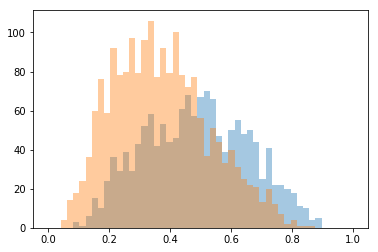

In [23]:
plt.hist(y_pred[np.where(y_test == 0)[0],0], bins=np.linspace(0,1,50), alpha=0.4);
plt.hist(y_pred[np.where(y_test == 1)[0],0], bins=np.linspace(0,1,50), alpha=0.4);

In [24]:
accuracy_score(y_test, y_pred[:,1].round())

0.656203288490284

In [25]:
roc_auc_score(y_test, y_pred[:,1])

0.6908418996147456

In [26]:
from datetime import date

In [27]:
data = pd.read_csv(data_dir + 'historical_data.csv')
add_elo_features(data)
add_targets(data)
data['date'] = pd.to_datetime(data['date'])
today = pd.Timestamp(date.today())
next_week = today + pd.Timedelta(1, unit='w')
weekly_preds = data[np.logical_and(data['date'] >= today, data['date'] < next_week)]

In [28]:
weekly_preds

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo2_post,score1,score2,elo_sum,elo_diff,elo_asym,outcome,point_sum,point_diff,point_asym
16409,2019-11-07,2019,0,NaN,OAK,LAC,1451.227479,1535.147006,0.472799,0.527201,...,NaN,NaN,NaN,2986.374485,-83.919527,-0.028101,0,NaN,NaN,NaN
16410,2019-11-10,2019,0,NaN,CIN,BAL,1313.380842,1637.030925,0.184085,0.815915,...,NaN,NaN,NaN,2950.411767,-323.650083,-0.109697,0,NaN,NaN,NaN
16411,2019-11-10,2019,0,NaN,NYJ,NYG,1308.913910,1345.645418,0.540592,0.459408,...,NaN,NaN,NaN,2654.559328,-36.731508,-0.013837,0,NaN,NaN,NaN
16412,2019-11-10,2019,0,NaN,NO,ATL,1677.668776,1401.747072,0.876804,0.123196,...,NaN,NaN,NaN,3079.415848,275.921704,0.089602,0,NaN,NaN,NaN
16413,2019-11-10,2019,0,NaN,TB,ARI,1435.465664,1375.140838,0.672921,0.327079,...,NaN,NaN,NaN,2810.606502,60.324827,0.021463,0,NaN,NaN,NaN
16414,2019-11-10,2019,0,NaN,CHI,DET,1528.433805,1471.037641,0.669200,0.330800,...,NaN,NaN,NaN,2999.471446,57.396164,0.019135,0,NaN,NaN,NaN
16415,2019-11-10,2019,0,NaN,CLE,BUF,1429.564998,1497.454912,0.495841,0.504159,...,NaN,NaN,NaN,2927.019909,-67.889914,-0.023194,0,NaN,NaN,NaN
16416,2019-11-10,2019,0,NaN,TEN,KC,1488.967355,1606.973039,0.424305,0.575695,...,NaN,NaN,NaN,3095.940394,-118.005684,-0.038116,0,NaN,NaN,NaN
16417,2019-11-10,2019,0,NaN,IND,MIA,1576.622114,1336.399573,0.852834,0.147166,...,NaN,NaN,NaN,2913.021687,240.222542,0.082465,0,NaN,NaN,NaN
16418,2019-11-10,2019,0,NaN,GB,CAR,1557.008574,1551.921945,0.599517,0.400483,...,NaN,NaN,NaN,3108.930518,5.086629,0.001636,0,NaN,NaN,NaN


In [29]:
weekly_preds[features]

,elo_sum,elo_diff,elo_asym,elo_prob1
16409,2986.374485,-83.919527,-0.028101,0.472799
16410,2950.411767,-323.650083,-0.109697,0.184085
16411,2654.559328,-36.731508,-0.013837,0.540592
16412,3079.415848,275.921704,0.089602,0.876804
16413,2810.606502,60.324827,0.021463,0.672921
16414,2999.471446,57.396164,0.019135,0.669200
16415,2927.019909,-67.889914,-0.023194,0.495841
16416,3095.940394,-118.005684,-0.038116,0.424305
16417,2913.021687,240.222542,0.082465,0.852834
16418,3108.930518,5.086629,0.001636,0.599517


In [30]:
weekly_preds['pred_proba'] = model.predict_proba(weekly_preds[features])[:,1]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
weekly_preds[['team1', 'team2', 'elo_prob1', 'pred_proba']]

,team1,team2,elo_prob1,pred_proba
16409,OAK,LAC,0.472799,0.467264
16410,CIN,BAL,0.184085,0.181937
16411,NYJ,NYG,0.540592,0.524854
16412,NO,ATL,0.876804,0.873586
16413,TB,ARI,0.672921,0.661838
16414,CHI,DET,0.669200,0.663018
16415,CLE,BUF,0.495841,0.488359
16416,TEN,KC,0.424305,0.422412
16417,IND,MIA,0.852834,0.846831
16418,GB,CAR,0.599517,0.596530


In [32]:
os.listdir('../data')

['latest_data.csv', 'weekly_preds.csv', 'historical_data.csv']

In [33]:
odds_data = pd.read_csv('../data/spreadspoke_scores.csv')

FileNotFoundError: [Errno 2] File b'../data/spreadspoke_scores.csv' does not exist: b'../data/spreadspoke_scores.csv'

In [ ]:
odds_data

In [ ]:
odds_data = odds_data[np.logical_not(odds_data['team_favorite_id'].isna())]
odds_data = odds_data[np.logical_not(odds_data['spread_favorite'].isna())]
odds_data = odds_data[np.logical_not(odds_data['over_under_line'].isna())]

In [ ]:
odds_data

In [ ]:
odds_data = odds_data[odds_data['schedule_season'] >= 1979]

In [ ]:
odds_data

In [ ]:
s1 = set(odds_data['team_home'].unique())
s2 = set(odds_data['team_away'].unique())

In [ ]:
teams = s1.union(s2)

In [ ]:
teams

In [ ]:
team_abbreviations = {
    'Arizona Cardinals':'ARI',
    'Atlanta Falcons':'ATL',
 'Baltimore Colts':'BAL',
 'Baltimore Ravens':'BAL',
 'Buffalo Bills':'BUF',
 'Carolina Panthers':'CAR',
 'Chicago Bears':'CHI',
 'Cincinnati Bengals':'CIN',
 'Cleveland Browns':'CLE',
 'Dallas Cowboys':'DAL',
 'Denver Broncos':'DEN',
 'Detroit Lions':'DET',
 'Green Bay Packers':'GB',
 'Houston Oilers':'HOU',
 'Houston Texans':'HOU',
 'Indianapolis Colts':'IND',
 'Jacksonville Jaguars':'JAX',
 'Kansas City Chiefs':'KC',
 'Los Angeles Chargers':'LA',
 'Los Angeles Raiders':'OAK',
 'Los Angeles Rams':'LAR',
 'Miami Dolphins':'MIA',
 'Minnesota Vikings':'MIN',
 'New England Patriots':'NE',
 'New Orleans Saints':'NO',
 'New York Giants':'NYG',
 'New York Jets':'NYJ',
 'Oakland Raiders':'OAK',
 'Philadelphia Eagles':'PHI',
 'Phoenix Cardinals':'PHE',
 'Pittsburgh Steelers':'PIT',
 'San Diego Chargers':'SD',
 'San Francisco 49ers':'SF',
 'Seattle Seahawks':'SEA',
 'St. Louis Cardinals':'SL',
 'St. Louis Rams':'SL',
 'Tampa Bay Buccaneers':'TB',
 'Tennessee Oilers':'TEN',
 'Tennessee Titans':'TEN',
 'Washington Redskins':'WAS'
}

In [ ]:
team_abb_rev = {v: k for (k, v) in team_abbreviations.items()}

In [ ]:
odds_data['team1'] = odds_data['team_home'].apply(lambda x: team_abbreviations.get(x, 'None'))
odds_data['team2'] = odds_data['team_away'].apply(lambda x: team_abbreviations.get(x, 'None'))

In [ ]:
odds_data['team1']

In [ ]:
odds_data['date'] = pd.to_datetime(odds_data['schedule_date'])

In [ ]:
odds_data = odds_data[['team1', 'team2', 'team_favorite_id', 'spread_favorite', 'date']]

In [ ]:
df = pd.merge(left=data, right=odds_data, on=['date', 'team1', 'team2'])

In [ ]:
df

In [ ]:
def adjust_spread(row):
    if row['team_favorite_id'] == row['team1']:
        return row['spread_favorite']
    elif row['team_favorite_id'] == row['team2']:
        return -1 * row['spread_favorite']
    elif row['team_favorite_id'] == 'PICK':
        return 0.0
    else:
        return np.nan

In [ ]:
df['adj_spread'] = df.apply(adjust_spread, axis=1)

In [ ]:
df[['date', 'team1', 'team2', 'adj_spread', 'team_favorite_id', 'spread_favorite']].head(24)

In [ ]:
features.extend(['adj_spread'])

In [ ]:
features

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target])

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:,1]

In [ ]:
model.coef_

In [ ]:
accuracy_score(y_test, y_pred.round())

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
weekly_odds = pd.read_csv('../data/2019-11-02-latest_odds.csv')

In [ ]:
weekly_odds

In [ ]:
weekly_odds['id_code'].unique()

In [ ]:
def nan_mean(x):
    return x[np.logical_not(x.isna())].mean()

In [ ]:
weekly_odds.groupby(['home_team', 'away_team', 'date']).agg({
    'spread':nan_mean}
)

In [ ]:
weekly_odds['home_team'].unique()

In [ ]:
weekly_odds['away_team'].unique()

In [ ]:
team_abb2 = {
    'lions':'DET',
    'bears':'CHI',
    'jaguars':'JAX',
    'rams':'LA',
    'texans':'HOU',
    'colts':'IND',
    'chiefs':'KC',
    'cardinals':'ARI',
    'bills':'BUF',
    'eagles':'PHI',
    'dolphins':'MIA',
    'raiders':'OAK',
    'broncos':'DEN',
    'ravens':'BAL',
    'giants':'NYG',
    'chargers':'SD',
    'jets':'NYG',
    'bengals':'CIN',
    'packers':'GB',
    '49ers':'SF',
    'redskins':'WAS',
    'browns':'CLE',
    'patriots':'NE',
    'panthers':'CAR',
    'titans':'TEN',
    'vikings':'MIN',
    'steelers':'PIT',
    'seahawks':'SEA',
    'buccaneers':'TB',
    'cowboys':'DAL',
    'saints':'NO',
    'falcons':'ATL'
}

In [ ]:
weekly_odds['team1'] = weekly_odds['home_team'].apply(lambda x: team_abb2.get(x, 'None'))
weekly_odds['team2'] = weekly_odds['away_team'].apply(lambda x: team_abb2.get(x, 'None'))

In [ ]:
weekly_odds_clean = weekly_odds.groupby(['date', 'team1', 'team2']).agg(
    {'spread':nan_mean}
).reset_index()

In [ ]:
weekly_odds_clean['date'] = pd.to_datetime(weekly_odds_clean['date'])

In [ ]:
weekly_odds_clean

In [ ]:
weekly_preds

In [ ]:
merged_pred_data = pd.merge(left=weekly_preds, right=weekly_odds_clean, on=['date', 'team1', 'team2'], how='left')

In [ ]:
merged_pred_data

In [34]:
def reward(prob1, result1, is_playoff=False):
    rounded_elo_prob = round(prob1, 2)
    elo_brier = (rounded_elo_prob - result1) * (rounded_elo_prob - result1)
    elo_points = 25 - (100 * elo_brier)
    elo_points = round(elo_points + 0.001 if elo_points < 0 else elo_points, 1) # Round half up
    if is_playoff:
        elo_points *= 2

    return elo_points

In [37]:
reward(0.65, 0, False)

-17.2

In [36]:
reward(0.65, 1, True)

25.6

In [38]:
import torch

In [39]:
def torch_reward(output, target):
    """ Torch implementation of the reward function without 
    the multiplier for playoffs.  """
    loss = 100 * (output - target)**2 - 25
    return torch.sum(loss)